In [27]:
import numpy as np
import pandas as pd
df=pd.read_csv("D:\\Excelr\ASSIGNMENTS\\sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [28]:
 
num_cols = df.select_dtypes(include='number')
#MEAN
mean=np.round(num_cols.mean(),2)
mean

Volume                   5.07
Avg Price            10453.43
Total Sales Value    33812.84
Discount Rate (%)       15.16
Discount Amount       3346.50
Net Sales Value      30466.34
dtype: float64

In [29]:
#MEDIAN
median=np.round(num_cols.median(),2)
median

Volume                  4.00
Avg Price            1450.00
Total Sales Value    5700.00
Discount Rate (%)      16.58
Discount Amount       988.93
Net Sales Value      4677.79
dtype: float64

In [30]:
#MODE
modes = np.round(num_cols.mode().iloc[0],2)
modes

Volume                   3.00
Avg Price              400.00
Total Sales Value    24300.00
Discount Rate (%)        5.01
Discount Amount         69.18
Net Sales Value        326.97
Name: 0, dtype: float64

In [31]:
#STD
std=np.round(num_cols.std())
std

Volume                   4.0
Avg Price            18080.0
Total Sales Value    50535.0
Discount Rate (%)        4.0
Discount Amount       4510.0
Net Sales Value      46359.0
dtype: float64

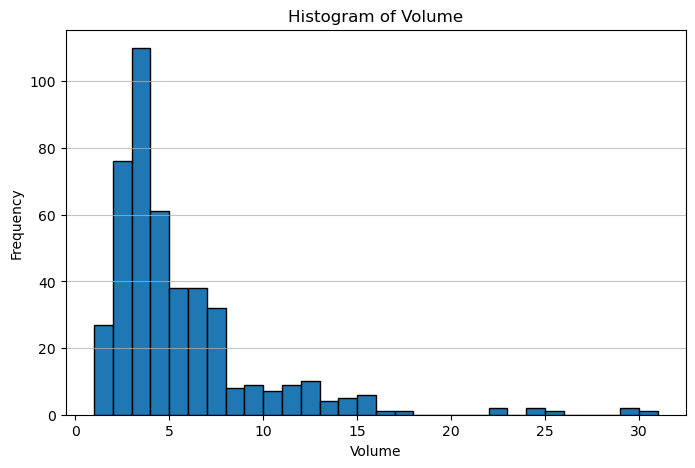

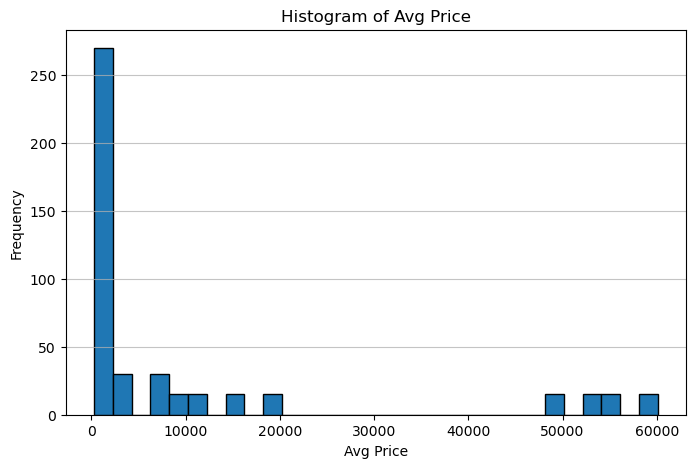

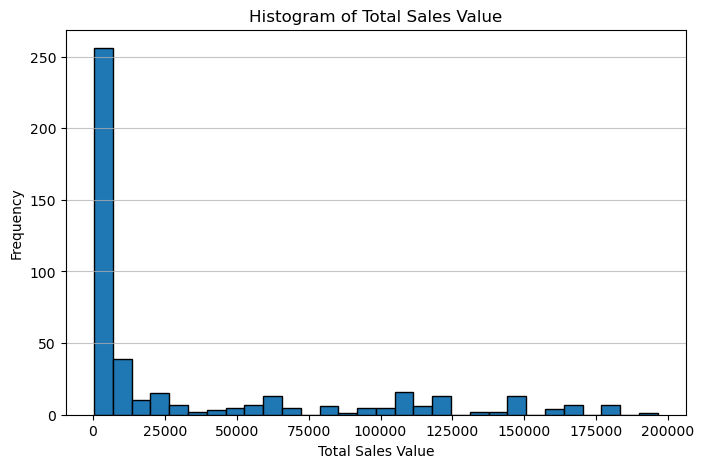

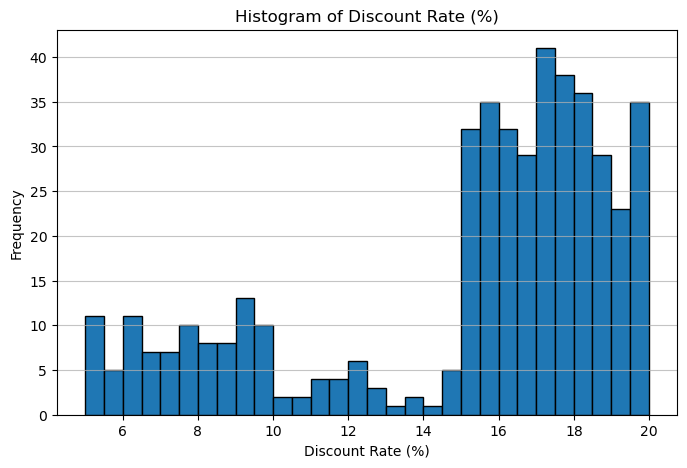

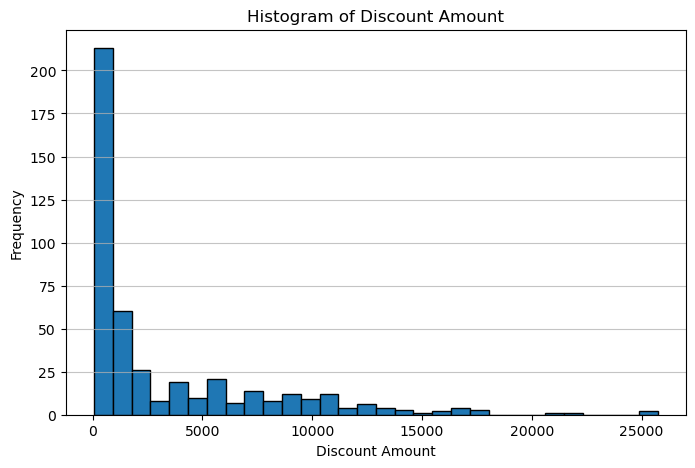

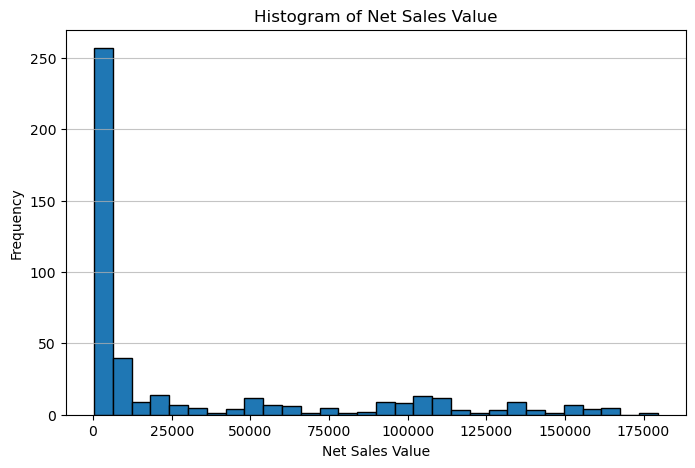

In [32]:
#Data Visualization
#HISTOGRAM
import matplotlib.pyplot as plt
for col in num_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    

In [50]:
#SKEWNESS
df.skew(numeric_only=True)


Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

In [49]:
#OUTLIERS
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
print(f"{col} has {len(outliers)} outliers")


Net Sales Value has 35 outliers


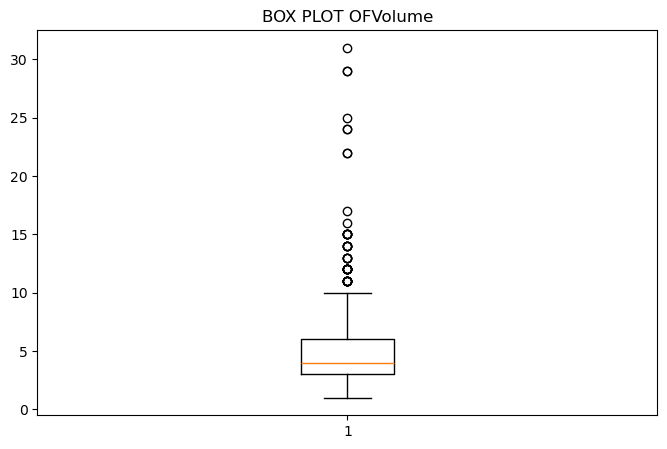

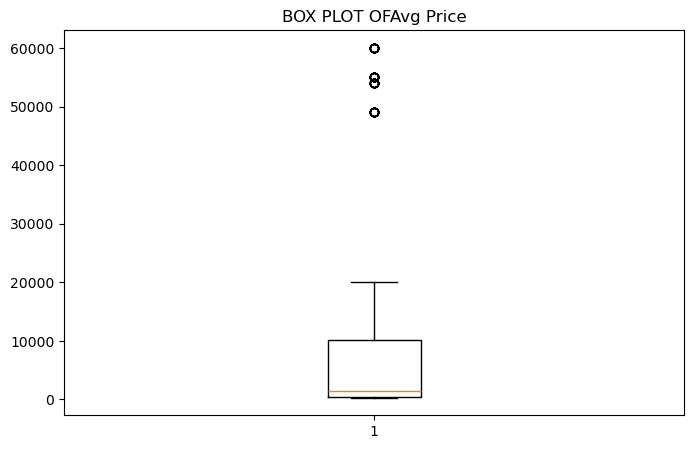

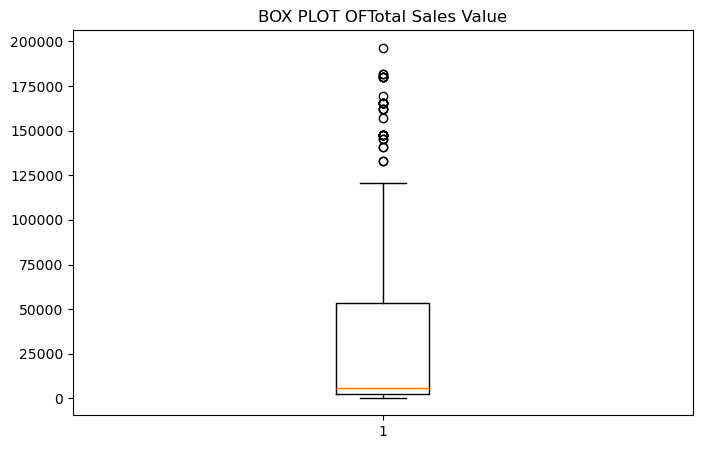

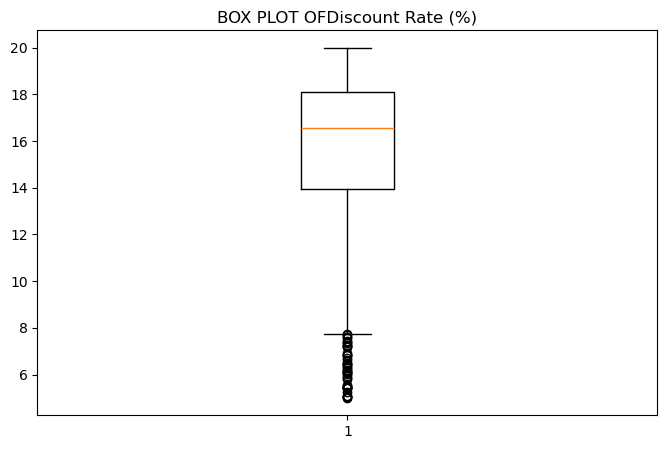

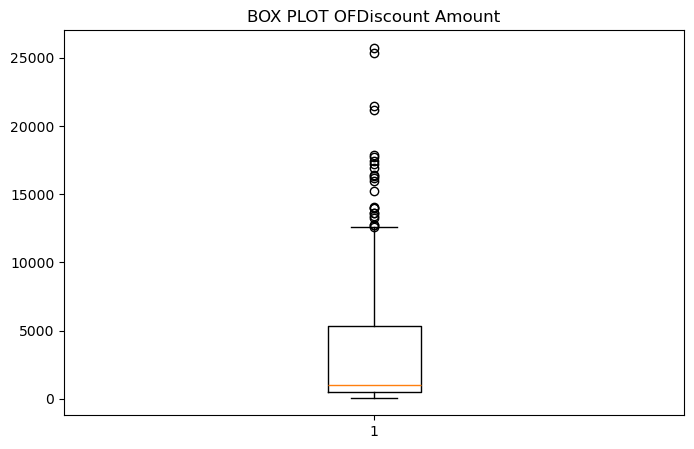

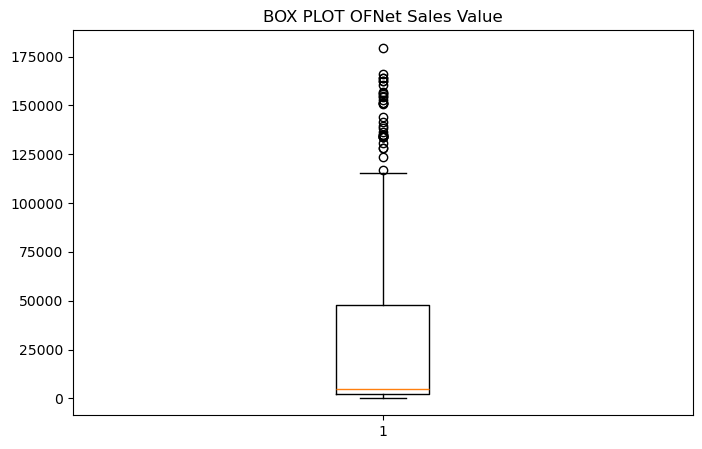

In [58]:
#BOX PLOT
import matplotlib.pyplot as plt
for col in num_cols:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[col].dropna())
    plt.title(f"BOX PLOT OF{col}")
    plt.show()

In [57]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


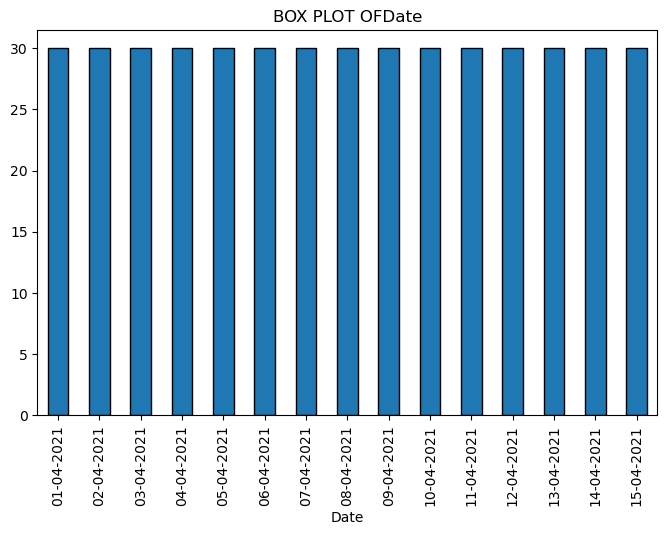

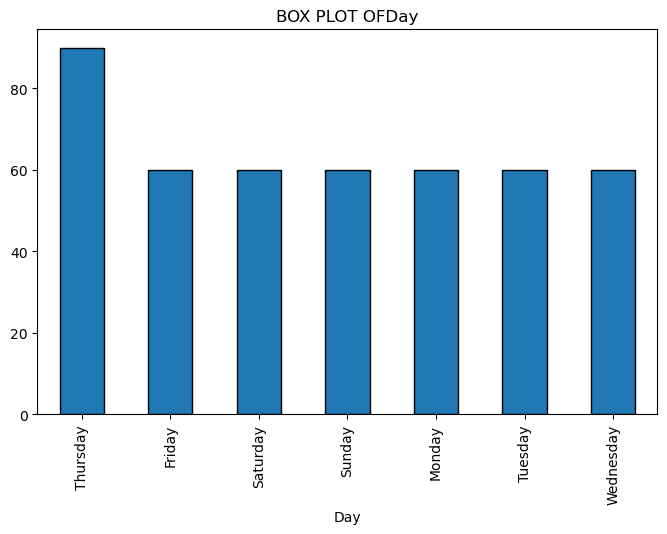

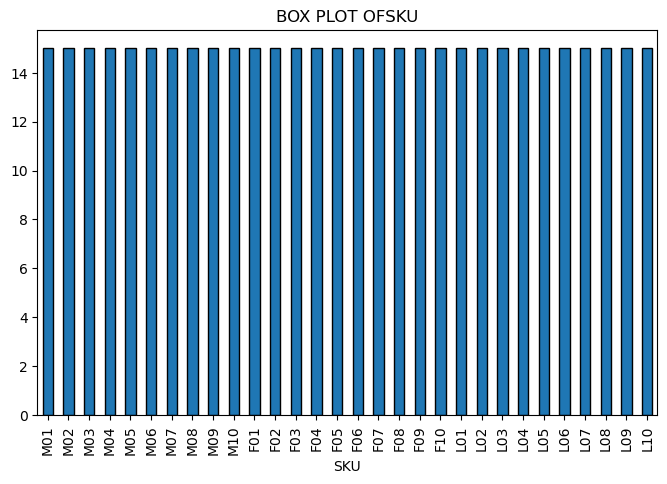

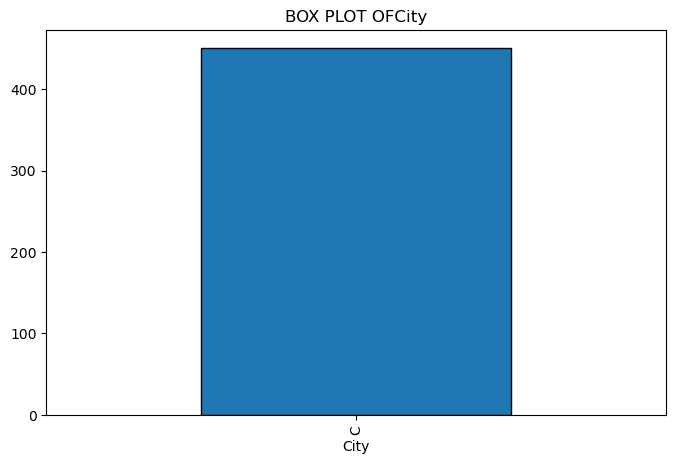

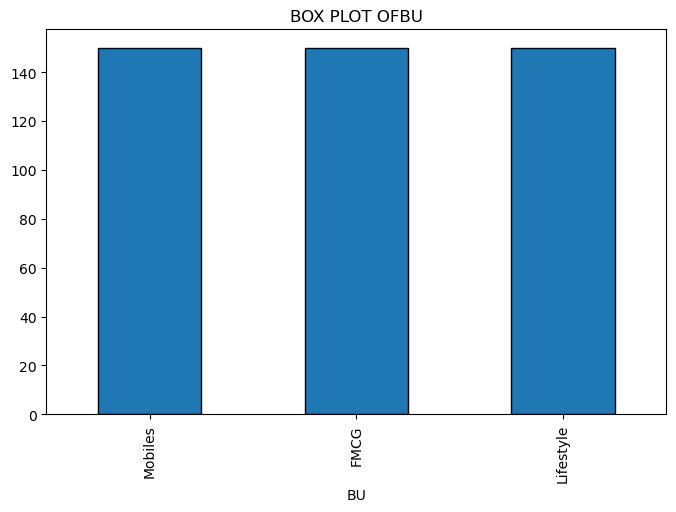

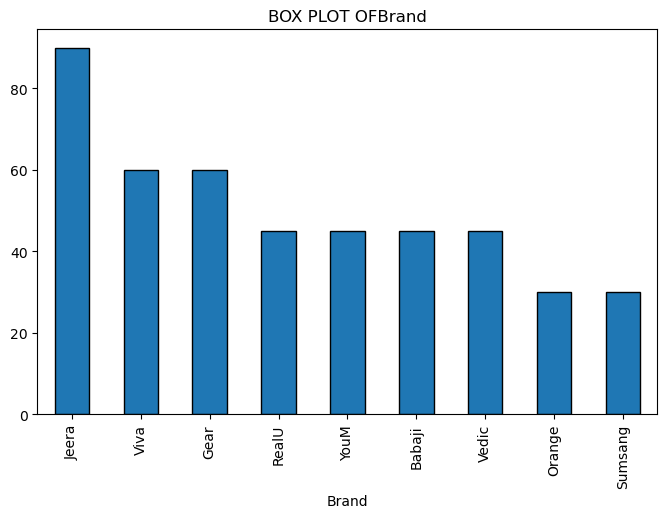

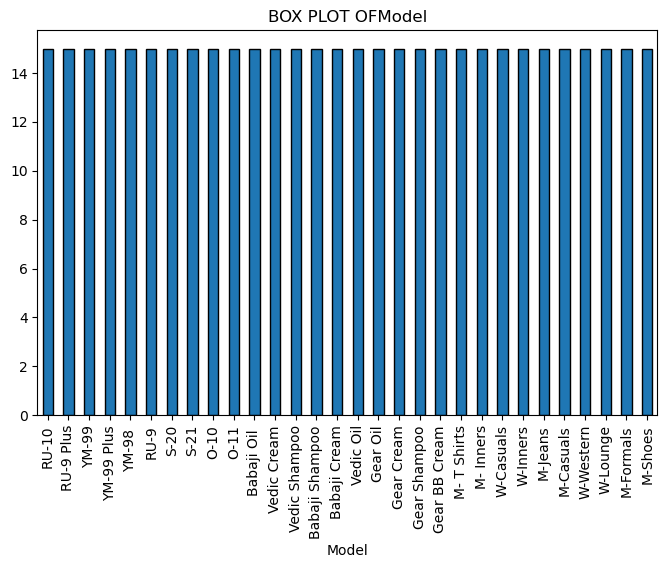

In [61]:
#BAR CHART
import matplotlib.pyplot as plt
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f"BOX PLOT OF{col}")
    plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SS=StandardScaler()
SS_X=SS.fit_transform(num_cols)
SS_X=pd.DataFrame(SS_X)
SS_X

,0,1,2,3,4,5
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [65]:
SS_X.columns=list(num_cols)
SS_X

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [80]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include='object').columns.tolist()
encoder=OneHotEncoder(drop=None,sparse_output=False)
after=encoder.fit_transform(df[categorical_cols])
after_df = pd.DataFrame(after, columns=encoder.get_feature_names_out(categorical_cols))
after_df

,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
import sklearn
print(sklearn.__version__)


1.6.1
